In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
main_folder="drive/MyDrive/dataset-resized"
import os
print(os.listdir(main_folder))

['glass', 'plastic', 'trash', 'paper', 'metal', 'cardboard']


In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio(main_folder, output='dataset-split', seed = 1337, ratio= (0.7,0.2,0.1), group_prefix =  None, move = False)

Copying files: 2537 files [00:48, 52.09 files/s] 


In [ ]:
print(os.listdir('dataset-split'))
print(os.listdir('dataset-split/train/cardboard'))

['val', 'test', 'train']
['cardboard236.jpg', 'cardboard109.jpg', 'cardboard388.jpg', 'cardboard300.jpg', 'cardboard108.jpg', 'cardboard115.jpg', 'cardboard402.jpg', 'cardboard292.jpg', 'cardboard197.jpg', 'cardboard237.jpg', 'cardboard372.jpg', 'cardboard403.jpg', 'cardboard277.jpg', 'cardboard85.jpg', 'cardboard32.jpg', 'cardboard192.jpg', 'cardboard211.jpg', 'cardboard359.jpg', 'cardboard314.jpg', 'cardboard201.jpg', 'cardboard39.jpg', 'cardboard87.jpg', 'cardboard137.jpg', 'cardboard146.jpg', 'cardboard60.jpg', 'cardboard89.jpg', 'cardboard238.jpg', 'cardboard86.jpg', 'cardboard263.jpg', 'cardboard210.jpg', 'cardboard394.jpg', 'cardboard343.jpg', 'cardboard180.jpg', 'cardboard4.jpg', 'cardboard305.jpg', 'cardboard320.jpg', 'cardboard185.jpg', 'cardboard61.jpg', 'cardboard110.jpg', 'cardboard162.jpg', 'cardboard286.jpg', 'cardboard337.jpg', 'cardboard38.jpg', 'cardboard338.jpg', 'cardboard318.jpg', 'cardboard271.jpg', 'cardboard241.jpg', 'cardboard21.jpg', 'cardboard18.jpg', 'cardbo

In [ ]:
import numpy as np

# loading training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        'dataset-split/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

# loading testing data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = train_datagen.flow_from_directory(
        'dataset-split/val',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')


Found 1773 images belonging to 6 classes.
Found 505 images belonging to 6 classes.


In [ ]:
from keras.applications import MobileNet
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

cnn_mobilenet=base_model.output
cnn_mobilenet=GlobalAveragePooling2D()(cnn_mobilenet)
cnn_mobilenet=Dense(1024,activation='relu')(cnn_mobilenet) #we add dense layers so that the model can learn more complex functions and classify for better results.
cnn_mobilenet=Dense(1024,activation='relu')(cnn_mobilenet) #dense layer 2
cnn_mobilenet=Dense(512,activation='relu')(cnn_mobilenet) #dense layer 3
preds=Dense(6,activation='softmax')(cnn_mobilenet) #final layer with softmax activation
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [ ]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model_1 = model.fit(x=train_generator,validation_data = test_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
55/55 [==============================] - 54s 843ms/step - loss: 0.5600 - accuracy: 0.8403 - val_loss: 1.8095 - val_accuracy: 0.6594
Epoch 2/10
55/55 [==============================] - 44s 792ms/step - loss: 0.5869 - accuracy: 0.8409 - val_loss: 1.4676 - val_accuracy: 0.6059
Epoch 3/10
55/55 [==============================] - 45s 809ms/step - loss: 0.5294 - accuracy: 0.8340 - val_loss: 1.3581 - val_accuracy: 0.6356
Epoch 4/10
55/55 [==============================] - 45s 816ms/step - loss: 0.4471 - accuracy: 0.8639 - val_loss: 1.4435 - val_accuracy: 0.6990
Epoch 5/10
55/55 [==============================] - 55s 994ms/step - loss: 0.4087 - accuracy: 0.8811 - val_loss: 1.1791 - val_accuracy: 0.7366
Epoch 6/10
55/55 [==============================] - 45s 817ms/step - loss: 0.4152 - accuracy: 0.8805 - val_loss: 1.2207 - val_accuracy: 0.7644
Epoch 7/10
55/55 [==============================] - 45s 811ms/step - loss: 0.3714 - accuracy: 0.8955 - val_loss: 1.3880 - val_accuracy: 0.7069

Text(0.5, 1.0, 'Accuracy Evolution')

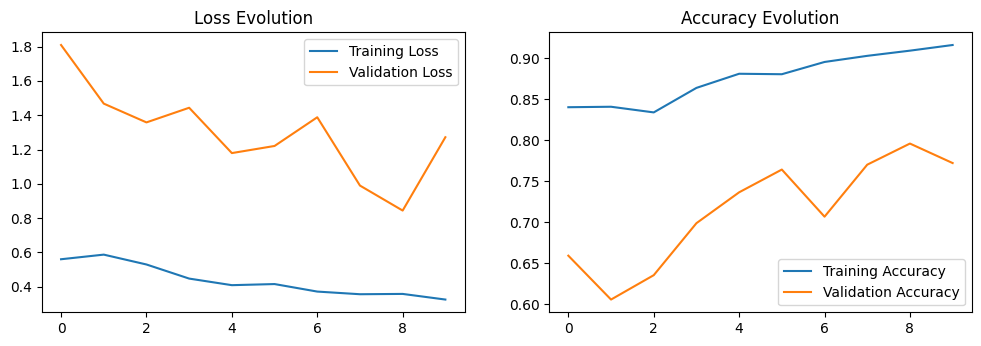

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(model_1.history['loss'], label="Training Loss")
plt.plot(model_1.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Evolution")

plt.subplot(2,2,2)
plt.plot(model_1.history['accuracy'], label="Training Accuracy")
plt.plot(model_1.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Evolution")

In [ ]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator)
print(f"TrainAccuracy: {evaluation[1] * 100:.2f}%")

16/16 [==============================] - 6s 347ms/step - loss: 1.2327 - accuracy: 0.7644
Test Accuracy: 76.44%
56/56 [==============================] - 12s 215ms/step - loss: 0.5338 - accuracy: 0.8827
TrainAccuracy: 88.27%


In [ ]:
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype("int32")

16/16 [==============================] - 4s 161ms/step


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis = 1)

# compute the confusion matrix
classification_report = classification_report(y_true, y_pred_classes)

print(classification_report)

              precision    recall  f1-score   support

           0       0.20      0.33      0.25        80
           1       0.21      0.21      0.21       102
           2       0.16      0.10      0.12        82
           3       0.23      0.19      0.21       118
           4       0.23      0.26      0.24        96
           5       0.07      0.04      0.05        27

    accuracy                           0.21       505
   macro avg       0.18      0.19      0.18       505
weighted avg       0.20      0.21      0.20       505



In [ ]:
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model
base_model=ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))

cnn_resnet=base_model.output
cnn_resnet=GlobalAveragePooling2D()(cnn_resnet)
cnn_resnet=Dense(1024,activation='relu')(cnn_resnet) #we add dense layers so that the model can learn more complex functions and classify for better results.
cnn_resnet=Dense(1024,activation='relu')(cnn_resnet) #dense layer 2
cnn_resnet=Dense(512,activation='relu')(cnn_resnet) #dense layer 3
preds=Dense(6,activation='softmax')(cnn_resnet) #final layer with softmax activation
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model_1 = model.fit(x=train_generator,validation_data = test_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
55/55 [==============================] - 186s 3s/step - loss: 1.7701 - accuracy: 0.2849 - val_loss: 9.4283 - val_accuracy: 0.1584
Epoch 2/10
55/55 [==============================] - 165s 3s/step - loss: 1.6140 - accuracy: 0.3234 - val_loss: 1.7490 - val_accuracy: 0.2337
Epoch 3/10
55/55 [==============================] - 167s 3s/step - loss: 1.6008 - accuracy: 0.3096 - val_loss: 1.7919 - val_accuracy: 0.2337
Epoch 4/10
55/55 [==============================] - 164s 3s/step - loss: 1.5860 - accuracy: 0.3113 - val_loss: 2.1822 - val_accuracy: 0.2337
Epoch 5/10
55/55 [==============================] - 165s 3s/step - loss: 1.5692 - accuracy: 0.3383 - val_loss: 13.1164 - val_accuracy: 0.1584
Epoch 6/10
55/55 [==============================] - 168s 3s/step - loss: 1.5411 - accuracy: 0.3449 - val_loss: 4.2453 - val_accuracy: 0.2337
Epoch 7/10
55/55 [==============================] - 164s 3s/step - loss: 1.4930 - accuracy: 0.3825 - val_loss: 3.5028 - val_accuracy: 0.2337
Epoch 8/10
5

In [ ]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator)
print(f"TrainAccuracy: {evaluation[1] * 100:.2f}%")

16/16 [==============================] - 5s 291ms/step - loss: 99.3103 - accuracy: 0.2337
Test Accuracy: 23.37%
56/56 [==============================] - 18s 314ms/step - loss: 98.8447 - accuracy: 0.2341
TrainAccuracy: 23.41%
